# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Destiani Intan Cendani
- **Email:** destianiic@gmail.com
- **ID Dicoding:** dicendani

## Menentukan Pertanyaan Bisnis

- Faktor-faktor apa aja yang berpengaruh terhadap jumlah penyewaan sepeda?
- Bagaimana kondisi cuaca/musim mempengaruhi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
# URL of the raw CSV files from the GitHub repository
hour_url = "https://raw.githubusercontent.com/destianiic/dicoding_tugas_akhir/main/hour.csv"
day_url = "https://raw.githubusercontent.com/destianiic/dicoding_tugas_akhir/main/day.csv"

# Load the data into Pandas DataFrames
hour_df = pd.read_csv(hour_url)
day_df = pd.read_csv(day_url)

# Check the data
hour_df.head()
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- seasonal trends, dapat mengamati bagaimana variasi musim berpengaruh terhadap penyewaan sepeda
- pengaruh cuaca seperti temperatur, kelembapan dan kecepatan angin dapat berpengaruh terhadap demand penyewaan sepeda

### Assessing Data

In [4]:
# check table hour_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# check if there's Na or NaN value in table
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
# check if there's duplicate value from hour_df

print("Jumlah data duplikasi: ", hour_df.duplicated().sum())

Jumlah data duplikasi:  0


In [7]:
# show statistic descriptive from hour_df

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# check table day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# check if there's Na or NaN value in table day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
# check if there's duplicate value from day_df

print("Jumlah data duplikasi: ", day_df.duplicated().sum())

Jumlah data duplikasi:  0


In [11]:
# show statistic descriptive from day_df

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tidak ada data yang kosong dan duplicate untuk kedua dataset
- data type masih berupa object, dan harus diconvert menjadi datetime untuk analysis yang lebih baik

### Cleaning Data

In [12]:
# cleaning hour_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
# convert dteday into datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Verify the changes
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [14]:
# cleaning day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
# convert dteday into datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Verify the changes
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [16]:
# check for duplicates of hour_df

hour_df.duplicated().sum()

0

In [17]:
# check for duplicates of day_df

day_df.duplicated().sum()

0

**Insight:**
- tidak ada duplikasi data dari kedua dataset
- dteday type sudah menjadi datetime yang dapat digunakan untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [18]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7101,7102,2011-10-28,4,0,10,12,0,5,1,2,0.38,0.3939,0.40,0.1642,46,167,213
13719,13720,2012-07-30,3,1,7,20,0,1,1,1,0.72,0.6818,0.70,0.2239,78,384,462
1208,1209,2011-02-23,1,0,2,10,0,3,1,1,0.20,0.2576,0.40,0.0000,4,47,51
3767,3768,2011-06-10,2,0,6,21,0,5,1,1,0.76,0.7273,0.66,0.1343,55,163,218
11010,11011,2012-04-08,2,1,4,22,0,0,0,1,0.50,0.4848,0.36,0.2239,33,85,118
7735,7736,2011-11-23,4,0,11,22,0,3,1,1,0.34,0.3030,0.61,0.4478,3,59,62
16469,16470,2012-11-23,4,1,11,23,0,5,1,1,0.42,0.4242,0.38,0.4478,20,47,67
2478,2479,2011-04-18,2,0,4,4,0,1,1,1,0.40,0.4091,0.87,0.1642,2,4,6
5759,5760,2011-09-02,3,0,9,10,0,5,1,2,0.64,0.6061,0.76,0.1642,34,106,140
11672,11673,2012-05-06,2,1,5,13,0,0,0,2,0.60,0.6061,0.64,0.0000,197,368,565


In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [20]:
hour_df.instant.is_unique

True

In [21]:
hour_df.groupby('season')['cnt'].mean()

,cnt
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


**Insight:**
- penyewaan sepeda bergantung pada season (musim)
- pengaruh hari libur pada banyaknya jumlah sepeda yang disewa

## Visualization & Explanatory Analysis

### Pertanyaan 1:

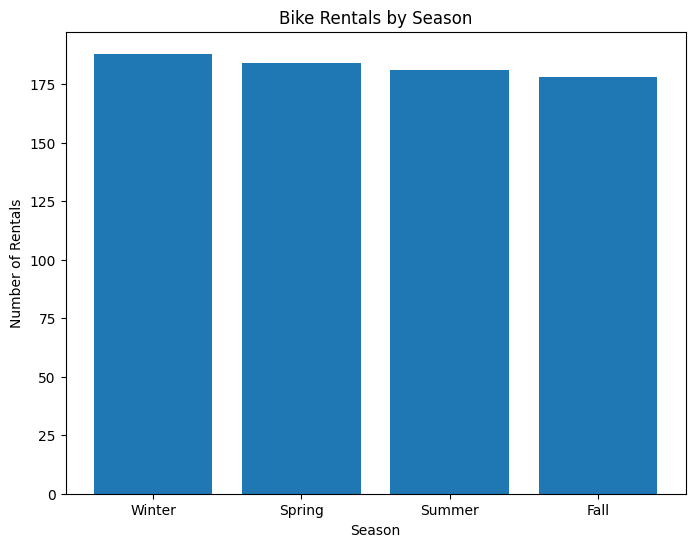

In [45]:
# Bar Chart: Rentals by Season
season_counts = day_df['season'].value_counts()
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']
plt.figure(figsize=(8, 6))
plt.bar(season_labels, season_counts)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()

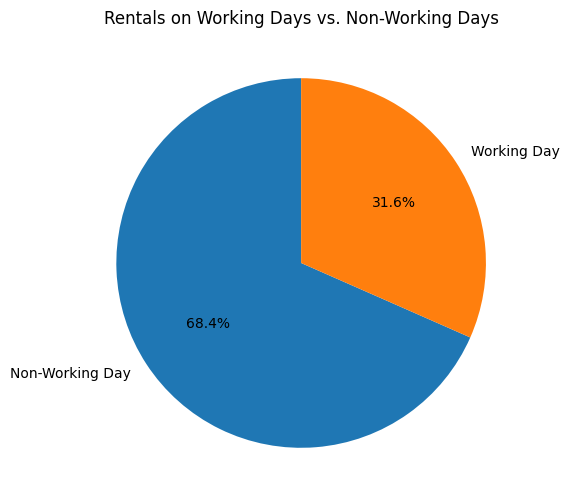

In [46]:
# Pie Chart: Rentals on Working Days vs. Non-Working Days
workingday_counts = day_df['workingday'].value_counts()
workingday_labels = ['Non-Working Day', 'Working Day']
plt.figure(figsize=(8, 6))
plt.pie(workingday_counts, labels=workingday_labels, autopct='%1.1f%%', startangle=90)
plt.title('Rentals on Working Days vs. Non-Working Days')
plt.show()

### Pertanyaan 2:

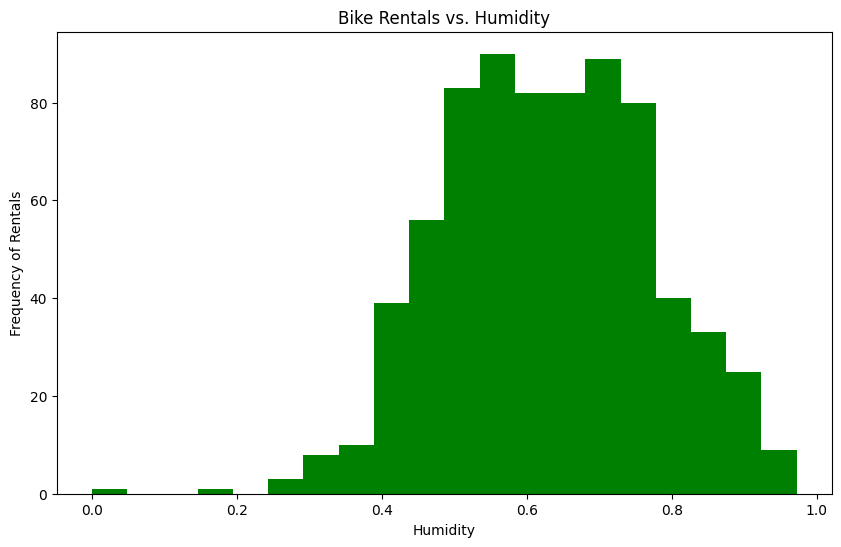

In [48]:
# Histogram: Rentals vs. Humidity
plt.figure(figsize=(10, 6))
plt.hist(day_df['hum'], bins=20, color='g')
plt.title('Bike Rentals vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency of Rentals')
plt.show()

<ipython-input-49-57f6a2cdfe71>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_rentals = day_df.groupby(temp_bins)['cnt'].mean()  # Calculate average rentals per bin


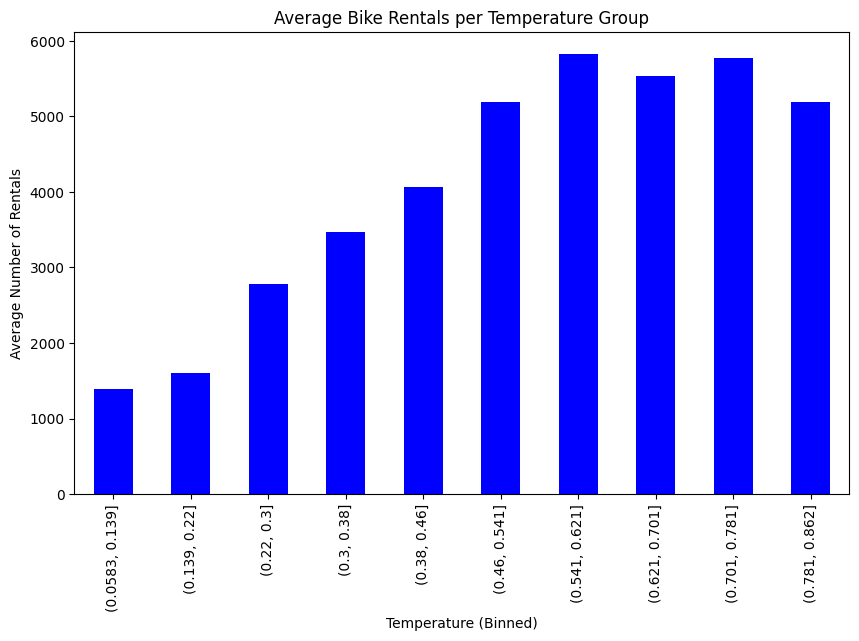

In [49]:
# Bar Chart: Rentals vs. Temperature
temp_bins = pd.cut(day_df['temp'], bins=10)  # Group temperatures into 10 bins
temp_rentals = day_df.groupby(temp_bins)['cnt'].mean()  # Calculate average rentals per bin

plt.figure(figsize=(10, 6))
temp_rentals.plot(kind='bar', color='b')
plt.title('Average Bike Rentals per Temperature Group')
plt.xlabel('Temperature (Binned)')
plt.ylabel('Average Number of Rentals')
plt.show()

**Insight:**
- faktor-faktor yang mempengaruhi adalah season, working day, holiday, weather and condition, dimana jumlah rental sepeda lebih tinggi pada saat winter yang ditunjukkan pada bar chart, dan jumlah rental lebih banyak pada non-working day yang ditunjukkan dengan bagian non-working day lebih besar daripada working day pada pie chart
- suhu berpengaruh terhadap rental sepeda, dimana seiring dengan meningkatkan suhu maka jumlah rental sepeda pun semakin tinggi, sedangkan jika kelembapan semakin meningkat orang-orang cenderung tidak ingin rental sepeda, dan juga kecepatan angin berpengaruh terhadap rental sepeda

## Analisis Lanjutan (Opsional)

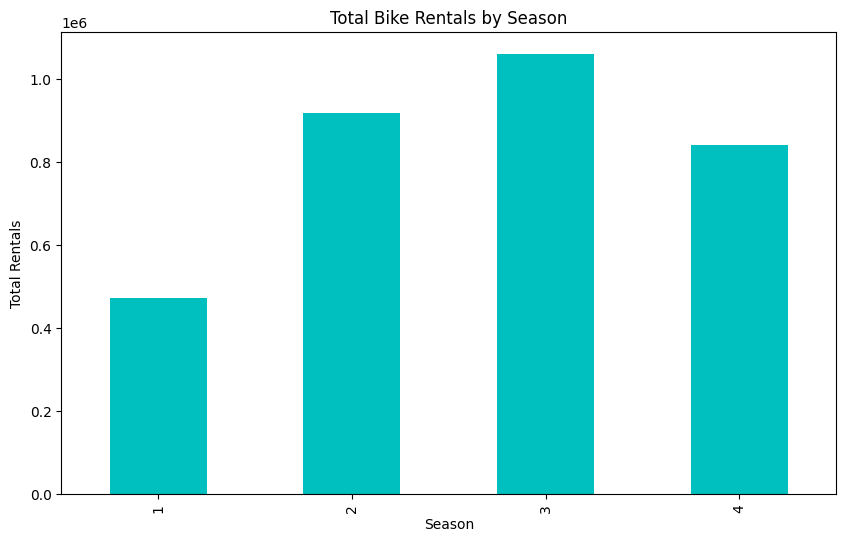

In [56]:
# Geoanalysis based on season (season as a proxy for different regions)
season_rentals = day_df.groupby('season')['cnt'].sum()

# Bar chart to show rentals by season
plt.figure(figsize=(10, 6))
season_rentals.plot(kind='bar', color='c')
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

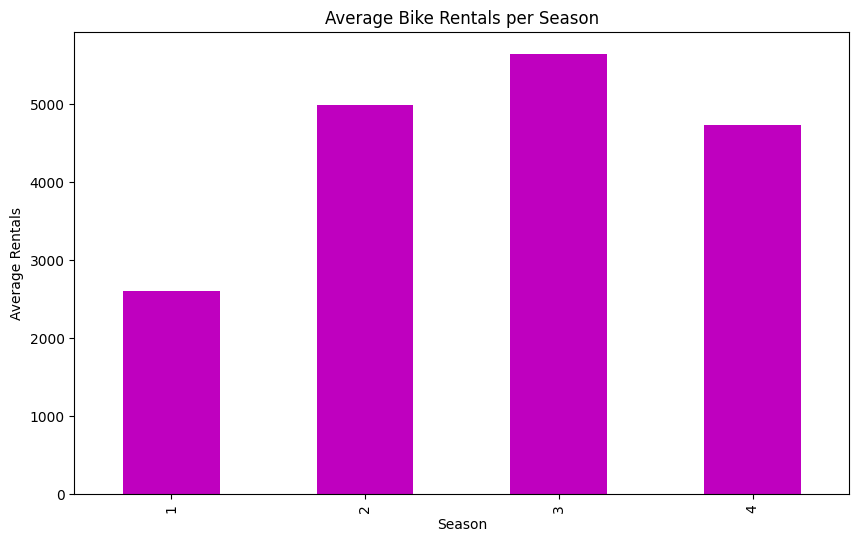

In [57]:
# Manual grouping of bike rentals by season
season_groups = day_df.groupby('season')['cnt'].mean()

# Bar chart for average rentals per season
plt.figure(figsize=(10, 6))
season_groups.plot(kind='bar', color='m')
plt.title('Average Bike Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

In [59]:
# Convert 'dteday' to datetime format if not already done
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Add 'Recency' as days since the last entry
latest_date = day_df['dteday'].max()
day_df['Recency'] = (latest_date - day_df['dteday']).dt.days

# Calculate Frequency (total rentals per day of the week)
rental_frequency = day_df.groupby('weekday')['cnt'].sum()

# Monetary value: Total rentals per day
monetary_value = day_df.groupby('dteday')['cnt'].sum()

# Display RFM
rfm_df = pd.DataFrame({
    'Recency': day_df.groupby('dteday')['Recency'].mean(),
    'Frequency': rental_frequency,
    'Monetary': monetary_value
})

print(rfm_df.head())

                     Recency  Frequency  Monetary
2011-01-01 00:00:00    730.0        NaN     985.0
2011-01-02 00:00:00    729.0        NaN     801.0
2011-01-03 00:00:00    728.0        NaN    1349.0
2011-01-04 00:00:00    727.0        NaN    1562.0
2011-01-05 00:00:00    726.0        NaN    1600.0


## Conclusion

- terdapat beberapa faktor yang mempengaruhi jumlah rental sepeda, seperti season (rental sepeda semakin banyak saat season 3), working days dimana jumlah rental akan semakin tinggi pada working day dibandingkan weekend, serta kondisi cuaca dimana semakin tinggi temperatur maka rental akan tinggi, sebaliknya jika kelembapan dan kecepatan semakin tinggi maka rental akan berkurang
- temperatur memiliki peranan tinggi terhadap jumlah rental sepeda, dimana semakin tinggi temperatur maka rental sepeda akan semakin banyak juga, sedangkan tingginya kelembapan dan kecepatan angin akan membuat rental sepeda semakin kecil/rendah